# **Hand Written Digit Prediction - Classification Analysis**

**Objective**

Objective of Hand Written Digit Prediction is to
develop a model that can accurately classify handwritten digits into their respective numerical values.
Use machine learning algorithms to train the model on a dataset of labeled handwritten digits.
Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score.
Identify the factors that influence the model's performance and optimize the model accordingly.
Deploy the optimized model for real-world applications such as recognizing handwritten digits in images or documents.

**Data Source**

Loading the dataset from default skliearn library.

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

# **Describe Data**

The digits dataset consists of 8x8 pixel image of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represnts

# **Data Visualization**

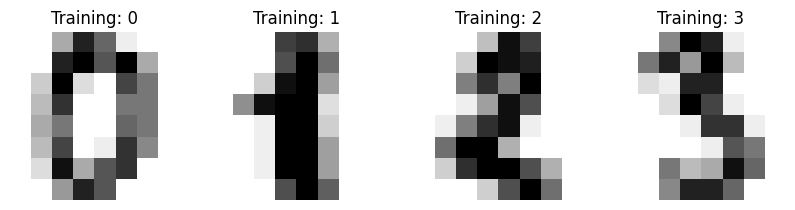

In [6]:
_, axes = plt.subplots(nrows=1, ncols =4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data= df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

**Scaling Image Data**

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Modeling**

**Random Forest Model**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Prediction**

In [27]:
y_pred = rf.predict(X_test)

In [28]:
y_pred

array([2, 9, 9, 9, 1, 7, 6, 3, 3, 1, 6, 7, 0, 0, 0, 7, 8, 6, 7, 9, 1, 0,
       3, 0, 6, 6, 3, 4, 8, 4, 3, 7, 3, 3, 5, 5, 8, 1, 8, 6, 9, 9, 6, 8,
       5, 9, 8, 8, 5, 7, 8, 6, 2, 2, 7, 9, 5, 1, 7, 9, 5, 1, 7, 8, 9, 5,
       3, 4, 4, 6, 6, 6, 9, 2, 3, 9, 1, 5, 7, 6, 0, 7, 1, 4, 6, 0, 4, 0,
       8, 6, 6, 0, 0, 1, 6, 0, 6, 2, 7, 0, 2, 0, 1, 9, 5, 9, 5, 2, 8, 9,
       6, 9, 4, 6, 6, 0, 7, 8, 7, 1, 1, 9, 5, 9, 4, 1, 4, 8, 3, 3, 7, 2,
       3, 9, 0, 5, 3, 7, 2, 0, 9, 4, 1, 0, 9, 1, 8, 4, 5, 4, 6, 3, 1, 4,
       9, 4, 6, 9, 6, 3, 2, 7, 0, 3, 2, 4, 5, 3, 7, 9, 5, 8, 1, 9, 7, 1,
       1, 8, 8, 6, 0, 0, 4, 1, 4, 8, 6, 5, 2, 8, 5, 8, 4, 5, 1, 8, 6, 4,
       1, 1, 4, 9, 1, 9, 2, 5, 3, 0, 6, 1, 1, 9, 4, 0, 5, 5, 4, 6, 6, 4,
       7, 9, 9, 2, 2, 4, 9, 8, 4, 4, 3, 7, 4, 7, 6, 4, 4, 6, 7, 4, 9, 2,
       9, 8, 6, 0, 5, 7, 8, 2, 3, 6, 2, 0, 9, 7, 1, 3, 0, 6, 5, 2, 3, 7,
       3, 5, 6, 5, 9, 9, 6, 3, 0, 2, 8, 9, 3, 9, 1, 2, 8, 7, 7, 0, 6, 1,
       2, 6, 2, 5, 4, 9, 7, 8, 3, 6, 9, 4, 8, 6, 0,

# **Model Evaluation**

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
confusion_matrix(y_test, y_pred)

array([[58,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 41,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 65,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 64]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        45
           3       0.98      0.96      0.97        51
           4       0.98      0.98      0.98        53
           5       0.93      0.98      0.95        42
           6       1.00      0.98      0.99        66
           7       0.98      0.98      0.98        55
           8       1.00      0.96      0.98        53
           9       0.96      0.97      0.96        66

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

